# <font color = blue> Lead Scoring Case Study </font>

## Problem Statement:
The education company, X Education, is facing challenges with its lead conversion rate. Although they generate a significant number of leads, the conversion rate is low. The company wants to improve efficiency by identifying the most potential leads, referred to as 'Hot Leads,' with a higher likelihood of conversion. The objective is to build a model that assigns a lead score to each lead, allowing the sales team to focus on communicating with the most promising leads.

### Objectives:
- **Improve Lead Conversion Rate:** The primary goal is to increase the lead conversion rate from the current 30% to around 80%. It involves identifying and targeting leads with higher conversion potential.

- **Build a Predictive Model:** To develop a predictive model that assigns lead scores to each lead based on various attributes. The lead score should reflect the likelihood of conversion.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

## <font color = blue> Exploratory Data Analysis (EDA) </font>
Understand the distribution of data, check for missing values, and explore relationships between variables.

In [3]:
# Loading the data
lead_df = pd.read_csv("Leads.csv")

# Display the first few rows of the dataset
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Check the shape of the data (number of rows and columns)
data_shape = lead_df.shape

# Print the result
print("Shape of the data:", data_shape)

Shape of the data: (9240, 37)


In [5]:
# Display information about the dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Display summary statistics of the numerical columns

lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check for duplicate rows
duplicate_rows = lead_df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

# Show the duplicate rows
duplicate_rows_data = lead_df[duplicate_rows]
duplicate_rows_data

Number of duplicate rows: 0


Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

**Inferences:** The dataset does not contain any duplicate rows.

In [8]:
# Dropping Prospect ID and Lead Number columns as these columns are identifiers which don't provide meaningful insights for analysis

lead_df.drop(columns=["Prospect ID", "Lead Number"], inplace=True)

In [9]:
# Rename the columns in the DataFrame 
new_column_names = {
    'Receive More Updates About Our Courses': 'Course Updates',  # Shortening the column name
    'Update me on Supply Chain Content': 'Supply Chain Updates',  # Shortening the column name
    'Get updates on DM Content': 'DM Content Updates',  # Shortening the column name
    'I agree to pay the amount through cheque': 'Agree to Cheque Payment',  # Making the name more concise
}

lead_df.rename(columns=new_column_names, inplace=True)

In [10]:
# Checking for missing values in each column
missing_values = lead_df.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                 

In [11]:
# Displaying the percentage of missing values for each column

(missing_values / len(lead_df)) * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Inferences:
- Some columns have a small number of missing values (e.g., Lead Source, TotalVisits, Page Views Per Visit, Last Activity).
- Several columns have a significant number of missing values (e.g., Country, Specialization, How did you hear about X Education, etc.).

### Missing values treatment



In [12]:
# Dropping columns with a high proportion (>40%) of missing values

lead_df.drop(columns=["Lead Quality", "Asymmetrique Activity Index", "Asymmetrique Profile Index", 
                      "Asymmetrique Activity Score", "Asymmetrique Profile Score"], inplace=True)

In [13]:
# Dropping rows with a low proportion (<10%) of missing values in specific columns

lead_df.dropna(subset=["Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity"], inplace=True)

In [14]:
# checking the percentage of missing values for each column again

missing_values = (lead_df.isnull().sum() / len(lead_df)) * 100
missing_values[missing_values>0]

Country                                          25.303064
Specialization                                   15.770333
How did you hear about X Education               24.245096
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Tags                                             36.665197
Lead Profile                                     29.777386
City                                             15.638087
dtype: float64

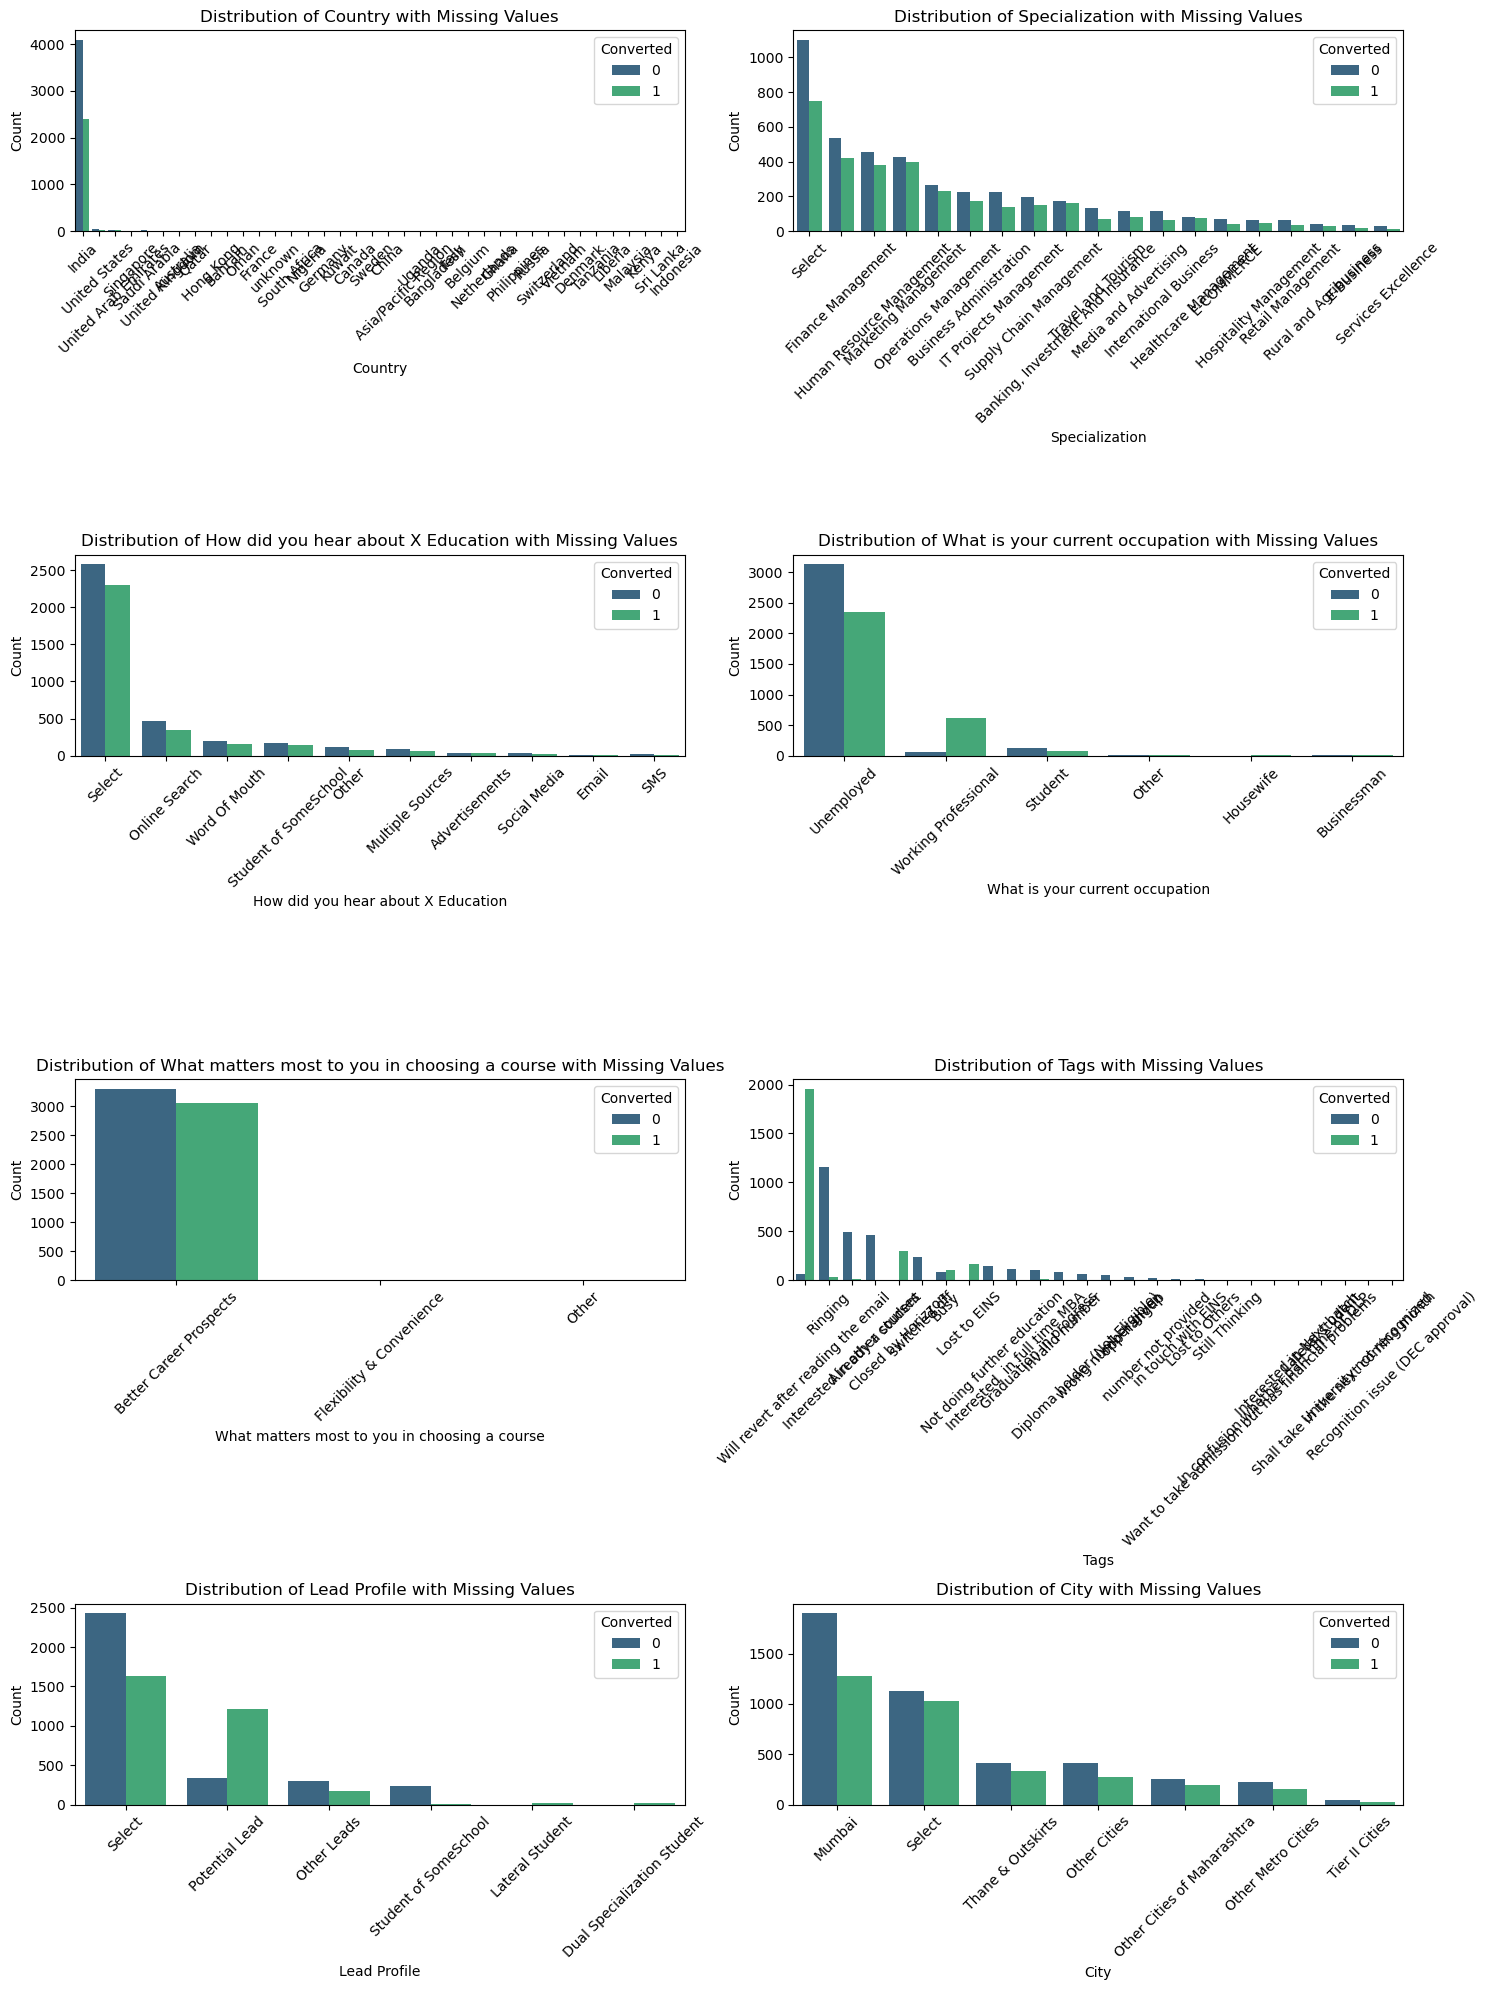

In [15]:
# Visulaizing categorical variables with missing values againt target variable

# List of categorical variables with missing values
categorical_variables = ['Country', 'Specialization', 'How did you hear about X Education',
                          'What is your current occupation', 'What matters most to you in choosing a course',
                          'Tags', 'Lead Profile', 'City']

# Setting up subplots for visualization
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Looping through each categorical variable
for i, categorical_variable in enumerate(categorical_variables):
    # Create a bar plot
    sns.countplot(x=categorical_variable, hue='Converted', data=lead_df, palette='viridis',
                  order=lead_df[categorical_variable].value_counts().index, ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {categorical_variable} with Missing Values')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=45)

    # Add legend
    axes[i].legend(title='Converted', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
categorical_variables = ['Country', 'Specialization', 'How did you hear about X Education',
                          'What is your current occupation', 'What matters most to you in choosing a course',
                          'Tags', 'Lead Profile', 'City']

for i in categorical_variables:
    print(lead_df[i].value_counts())
    print("\n")

Country
India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

**Inferences:** There are several columns in the dataset where the most frequent value is `'Select'`. This likely indicates that customers either missed filling in these details or left them blank. To retain information and avoid losing data by removing these instances, we have converted the `'Select'` values in those columns to `'Not Specified'`. This ensures that the missing or unspecified data is captured and can be appropriately handled in subsequent analyses.

In [17]:
# Impute missing values for 'Country': Replace null values with the most frequent value 'India'
lead_df['Country'].fillna('India', inplace=True)

# Impute missing values for 'Specialization': Replace 'Select' and null values with 'Not Specified'
lead_df['Specialization'].replace(['Select', np.nan], 'Not Specified', inplace=True)

# Impute missing values for 'How did you hear about X Education': Replace null values with 'Not Specified'
lead_df['How did you hear about X Education'].replace(['Select', np.nan], 'Not Specified', inplace=True)

# Impute missing values for 'What is your current occupation': Replace null values with 'Not Specified'
lead_df['What is your current occupation'].fillna('Not Specified', inplace=True)

# Impute missing values for 'What matters most to you in choosing a course': Replace null values with 'Better Career Prospects'
lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

# Impute missing values for 'Tags': Replace null values with 'Not Specified'
lead_df['Tags'].fillna('Not Specified', inplace=True)

# Impute missing values for 'Lead Profile': Replace 'Select' and null values with 'Not Specified'
lead_df['Lead Profile'].replace(['Select', np.nan], 'Not Specified', inplace=True)

# Impute missing values for 'City': Replace 'Select' and null values with 'Not Specified'
lead_df['City'].replace(['Select', np.nan], 'Not Specified', inplace=True)

In [18]:
# checking the percentage of missing values for each column again

missing_values = (lead_df.isnull().sum() / len(lead_df)) * 100
missing_values

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

**Inferences:** We have carefully addressed missing values and 'Select' values in the dataset. As a result, there are no remaining missing values in any of the columns. 

In [19]:
# Check again the shape of the data
data_shape = lead_df.shape

# Print the result
print("Shape of the data:", data_shape, "\n\n")

# Check again information about the dataset 
lead_df.info()

Shape of the data: (9074, 30) 


<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                 

In [20]:
# Reset the index to match the number of rows in the DataFrame

lead_df.reset_index(drop=True, inplace=True)

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### Data visualization

In [21]:
# Checking data balance

(lead_df.Converted.sum()/len(lead_df)) * 100

37.85541106458012

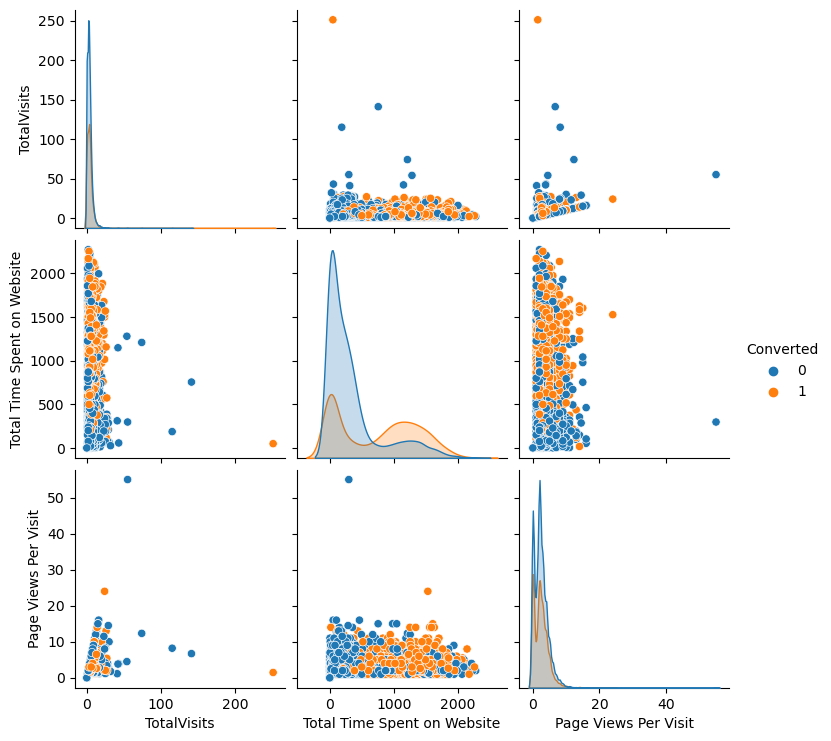

In [22]:
# Using pair plots to visualize scatter plots between pairs of numerical variables

sns.pairplot(lead_df, hue='Converted')
plt.show()

Exploring how categorical variables relate to the target variable using count plots

In [23]:
# Function which take list of categorical columns and plots count plots for each column w.r.t. the 'Converted' variable

def plot_categorical_columns(data, categorical_columns, target_column='Converted', figsize=(20, 15)):
    # Set up the subplot grid
    num_plots = len(categorical_columns)
    num_rows = (num_plots + 1) // 2  
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    # Iterate through categorical variables and create bar plots
    for i, variable in enumerate(categorical_columns):
        sns.countplot(x=variable, hue=target_column, data=data, ax=axes[i // 2, i % 2], palette="viridis")
        axes[i // 2, i % 2].set_title(f'Distribution of {variable} with {target_column}')
        axes[i // 2, i % 2].set_xlabel(variable)
        axes[i // 2, i % 2].set_ylabel('Count')
        axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

    # Show the plots
    plt.show()

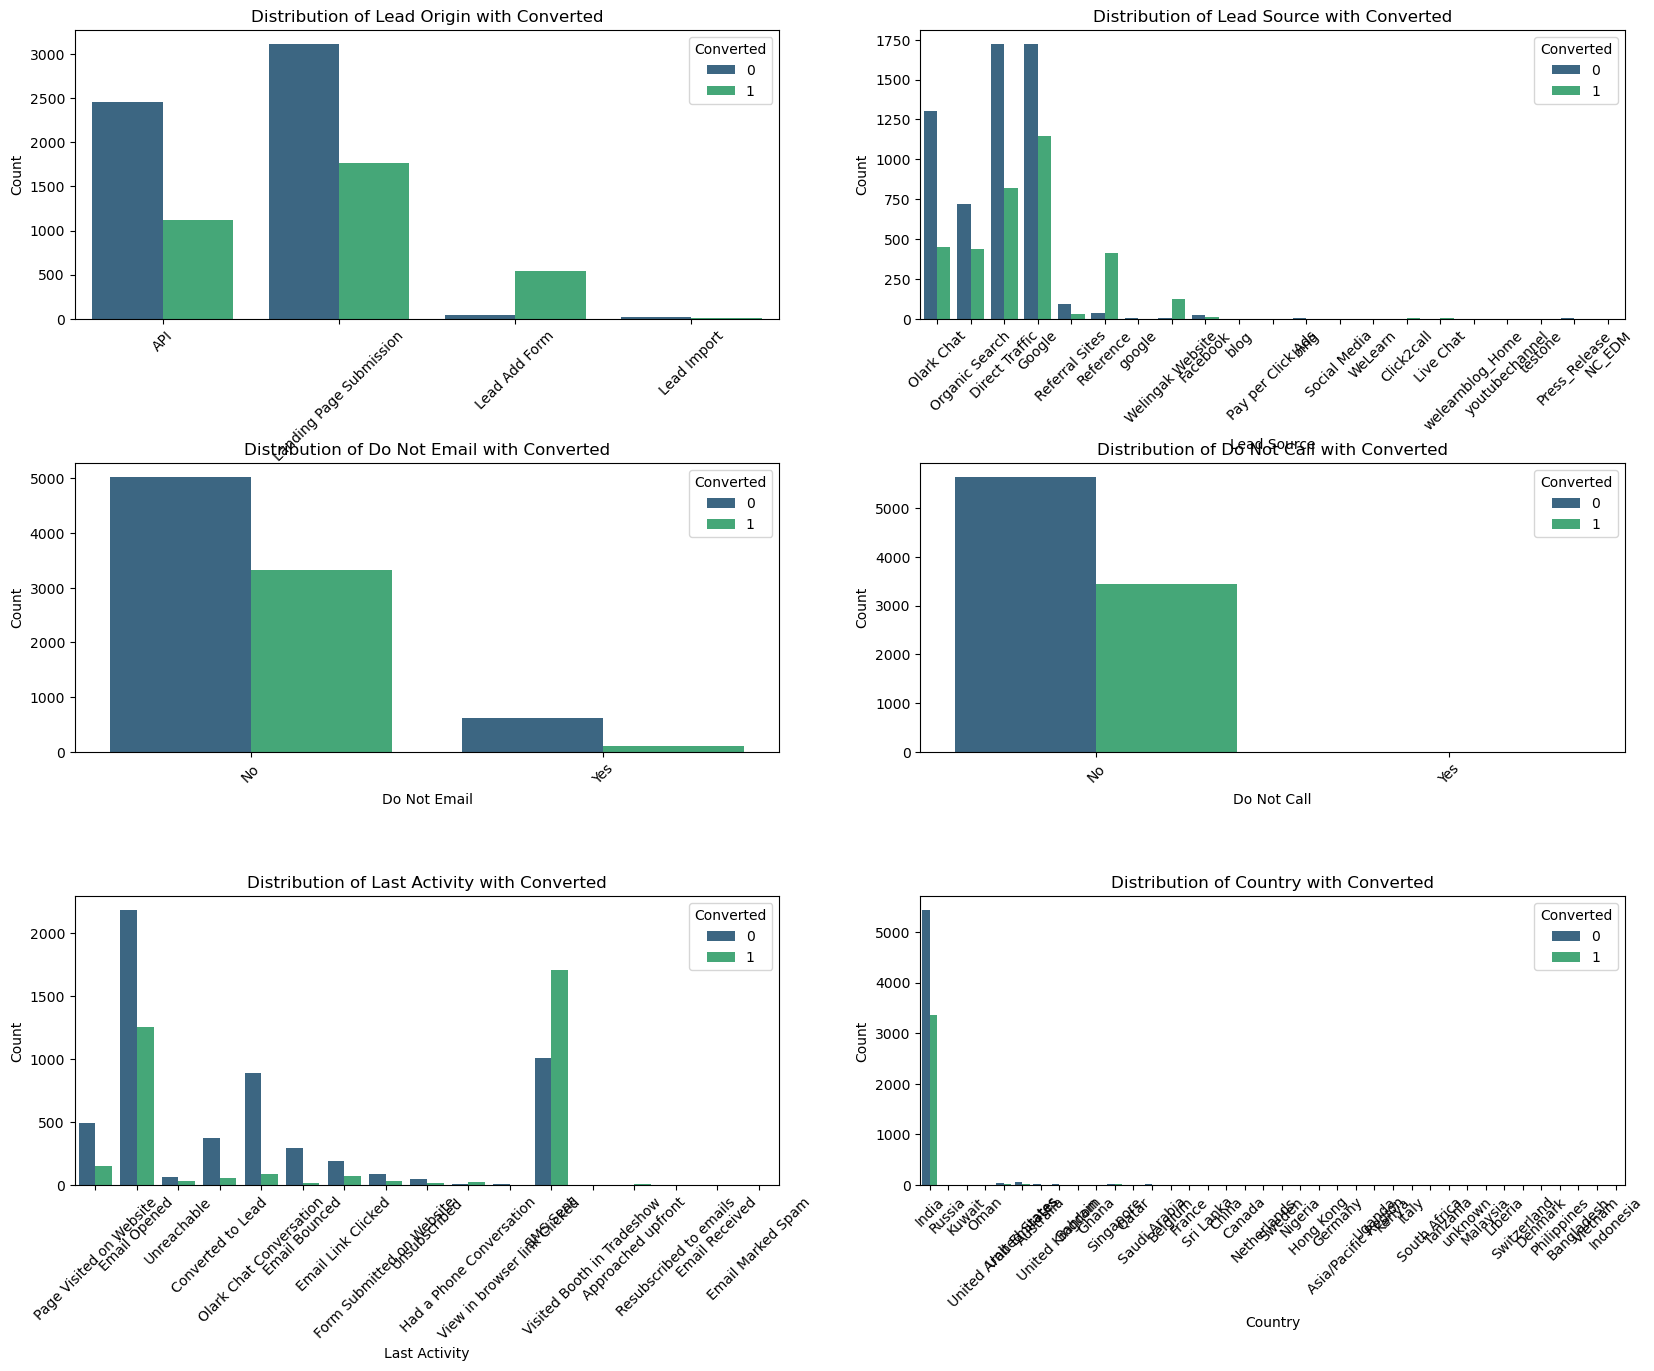

In [24]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country']
plot_categorical_columns(lead_df, categorical_columns)

- **Lead Origin:** The majority of conversions come from leads that originated from Landing Page Submissions. The API is also a significant source of conversions.
- **Lead Source:** Google, Direct Traffic, and Reference are the top three lead sources, followed by Olark Chat, Organic Search.
- **Last Activity:** Sending SMS and Email opening are the two most successful activities in terms of lead conversions. 
- **Country:** Almost 95% of customer are from India, dropping this column as it is not suitable.

In [25]:
# Dropping the 'Country' column as it contains almost 95% of customers from India.
# Also dropping 'Do Not Email' and 'Do Not Call' as the majority of values are the same (e.g., 'No'), 
# and there is little variability, it may not contribute much to the analysis.

lead_df.drop(columns=['Country', 'Do Not Email', 'Do Not Call'], inplace=True)

In [26]:
# Identify values with fewer than 10 occurrences for 'Lead Source'

source_counts = lead_df['Lead Source'].value_counts()
values_to_replace = source_counts[source_counts < 10].index

# Create a new category "Other" for 'Lead Source'

lead_df['Lead Source'] = lead_df['Lead Source'].replace(values_to_replace, 'Others')

In [27]:
# Identify values with fewer than 100 occurrences for 'Last Activity'

activity_counts = lead_df['Last Activity'].value_counts()
values_to_replace_activity = activity_counts[activity_counts < 100].index

# Create a new category "Other" for 'Last Activity'

lead_df['Last Activity'] = lead_df['Last Activity'].replace(values_to_replace_activity, 'Others')

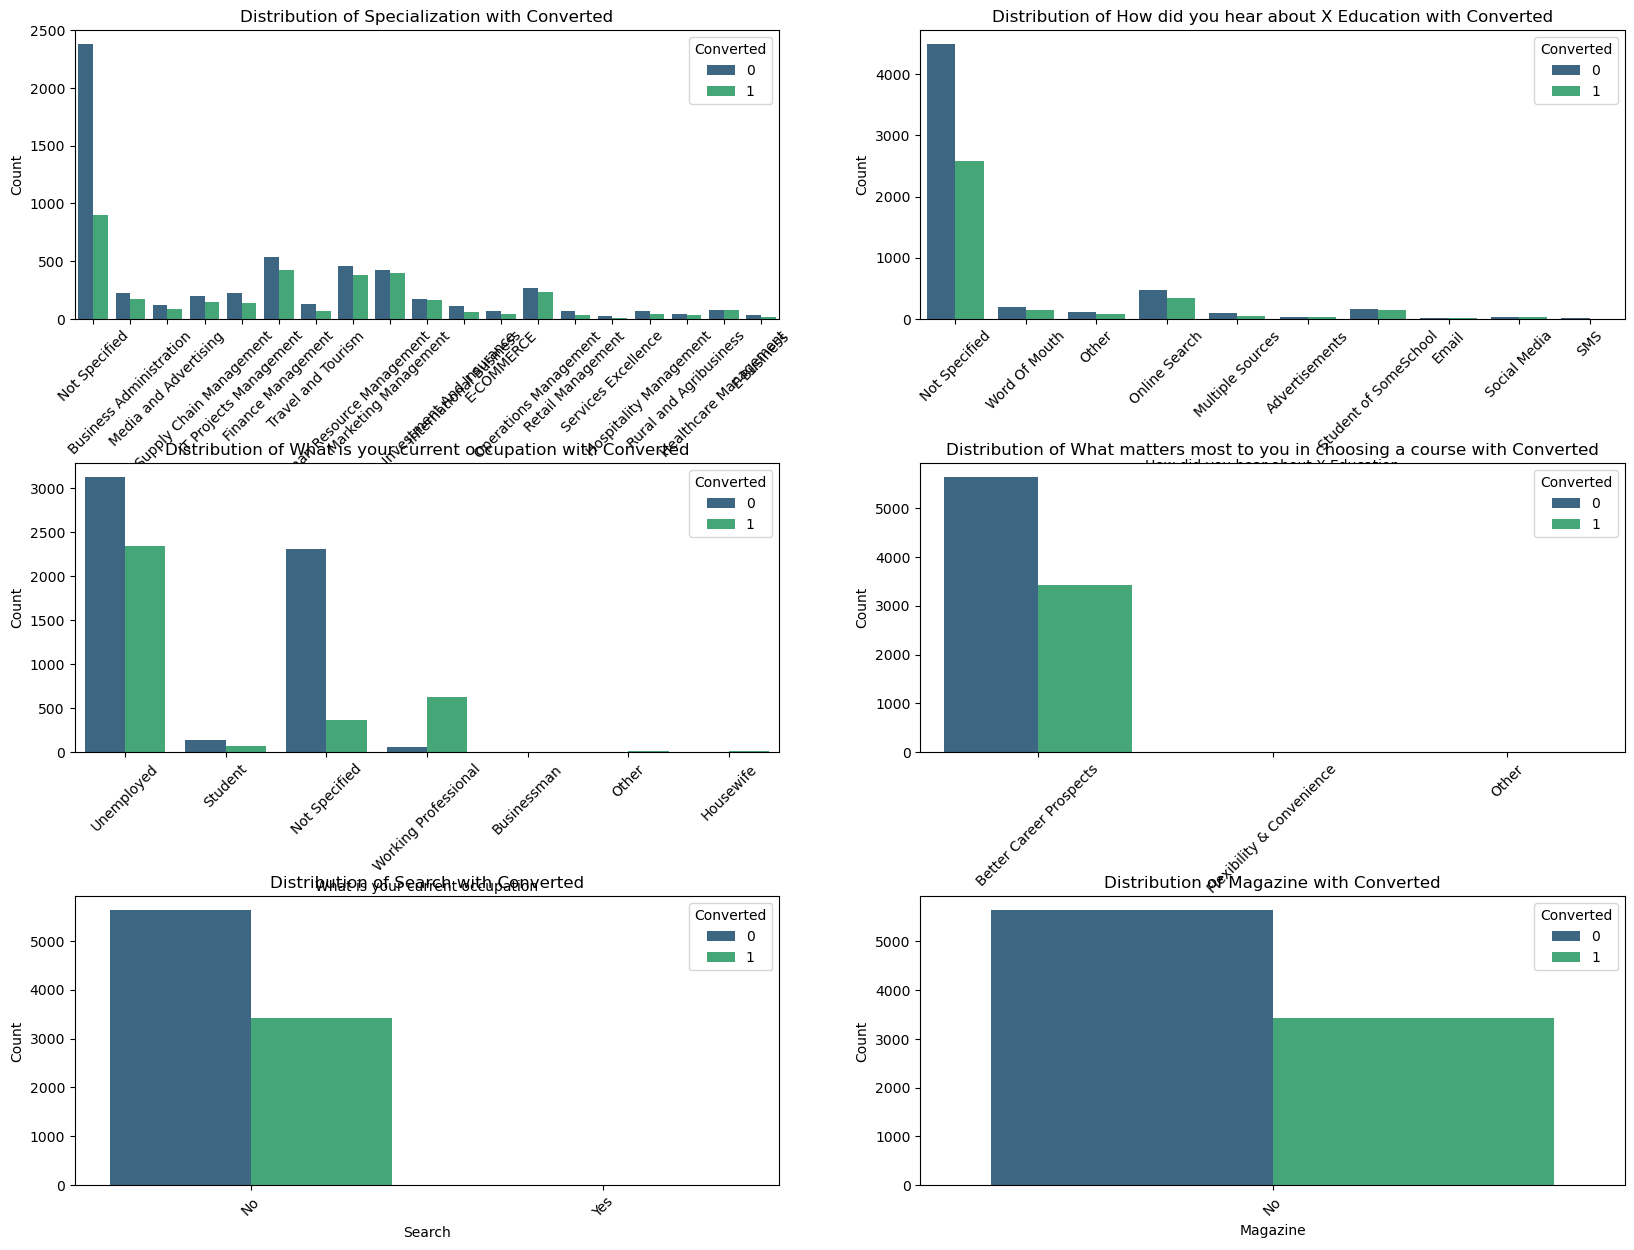

In [28]:
categorical_columns = ['Specialization', 'How did you hear about X Education',
                          'What is your current occupation', 'What matters most to you in choosing a course',
                          'Search', 'Magazine']
plot_categorical_columns(lead_df, categorical_columns)

- **Specialization:** A significant number of leads have not specified their specialization (Select). Specializations related to Finance Management, Marketing Management, and Human Resource Management have a notable number of conversions.
- **How did you hear about X Education:** Most of the users did not specified their details.
- **What is your current occupation:** The majority of conversions come from individuals who are unemployed. Working professionals also contribute significantly to the conversions.
- **What matters most to you in choosing this course:** Almost 70% of individuals emphasized better career prospects. Whereas 28% did not mention, which is not very informative.

In [29]:
# Dropping the columns which are not much useful for analysis
#'How did you hear about X Education', 'What matters most to you in choosing a course', 'Search', 'Magazine'

lead_df.drop(columns=['How did you hear about X Education', 'What matters most to you in choosing a course', 
                      'Search', 'Magazine'], inplace=True)

In [30]:
# Identify values with fewer than 70 occurrences for "Specialization"

specialization_counts = lead_df['Specialization'].value_counts()
values_to_replace_specialization = specialization_counts[specialization_counts < 70].index

# Create a new category "Other" for "Specialization"

lead_df['Specialization'] = lead_df['Specialization'].replace(values_to_replace_specialization, 'Others')

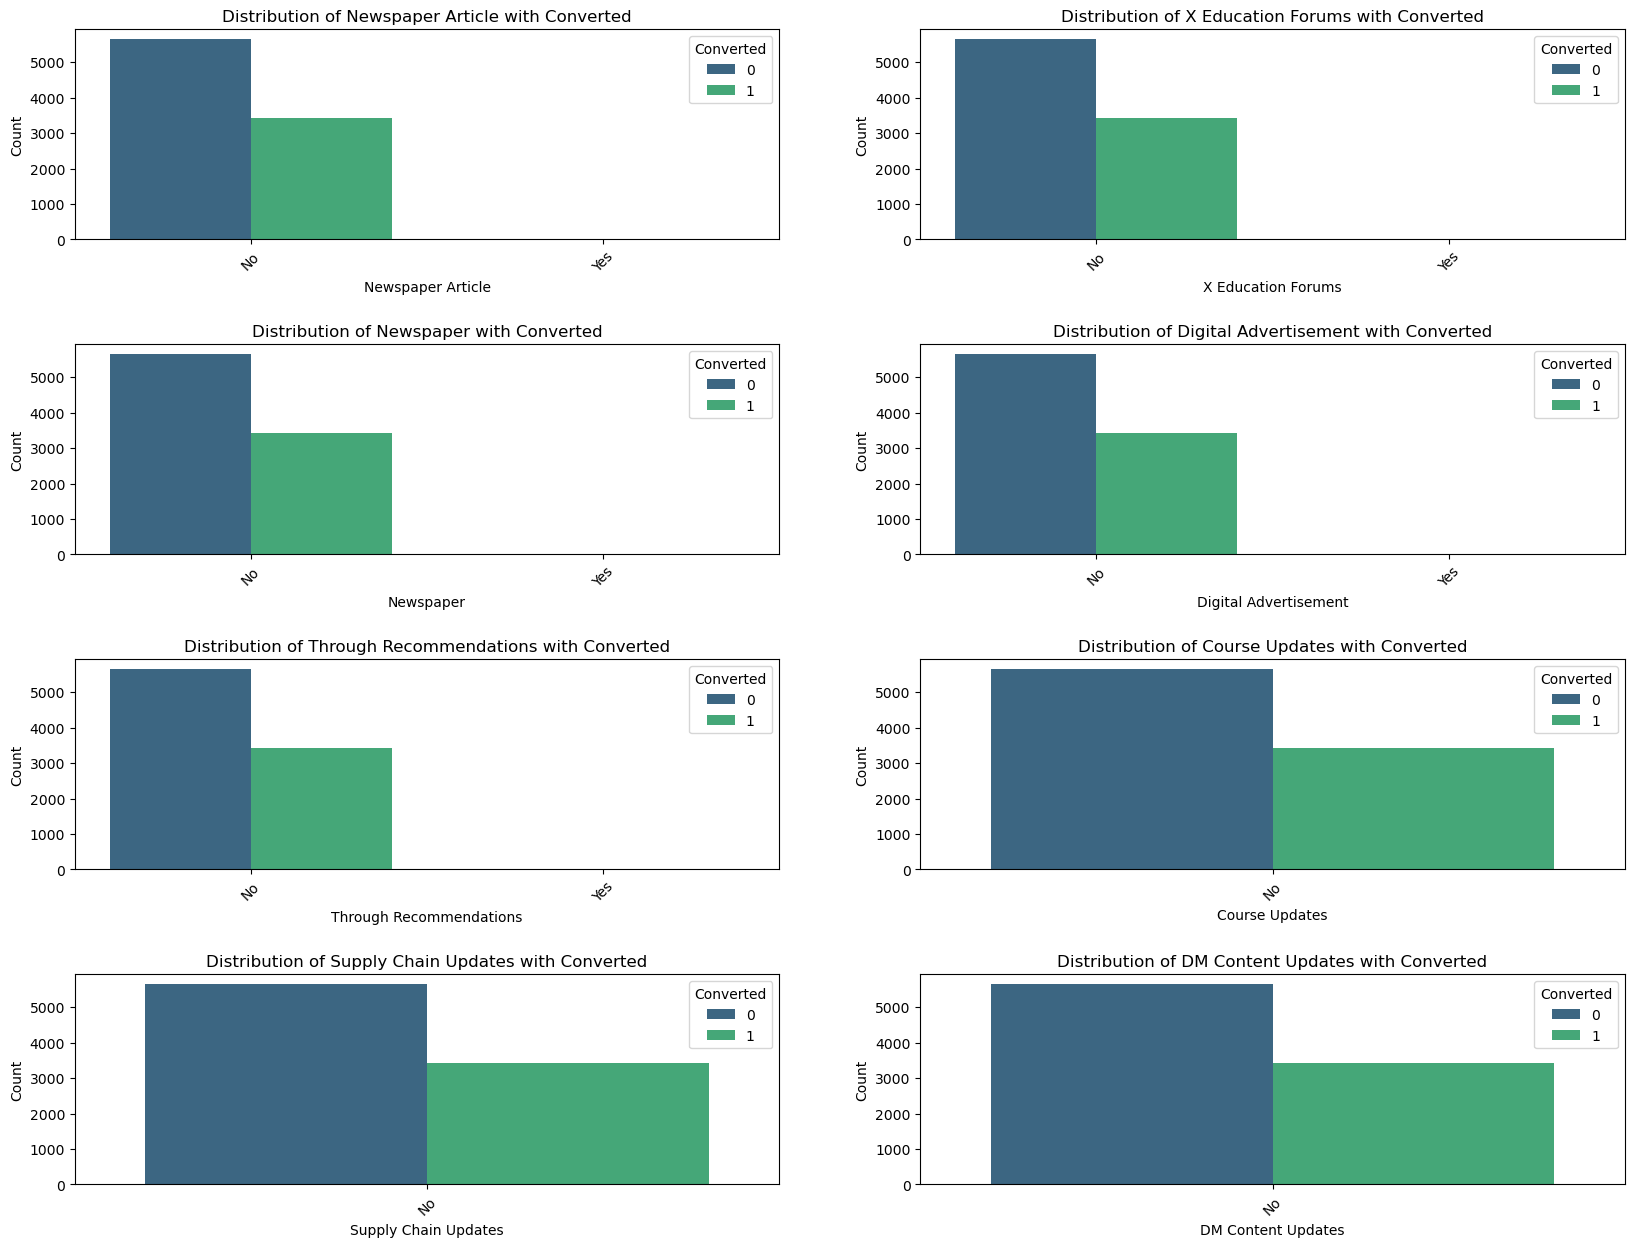

In [31]:
categorical_columns = ['Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                       'Through Recommendations', 'Course Updates', 'Supply Chain Updates', 
                       'DM Content Updates']
plot_categorical_columns(lead_df, categorical_columns)

In [32]:
# Dropping 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
# 'Course Updates', 'Supply Chain Updates' and 'DM Content Updates' as these columns have little variability and most 
#  values are the same i.e, 'No', they may not be informative.

lead_df.drop(columns=['Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                       'Through Recommendations', 'Course Updates', 'Supply Chain Updates', 
                       'DM Content Updates'], inplace=True)

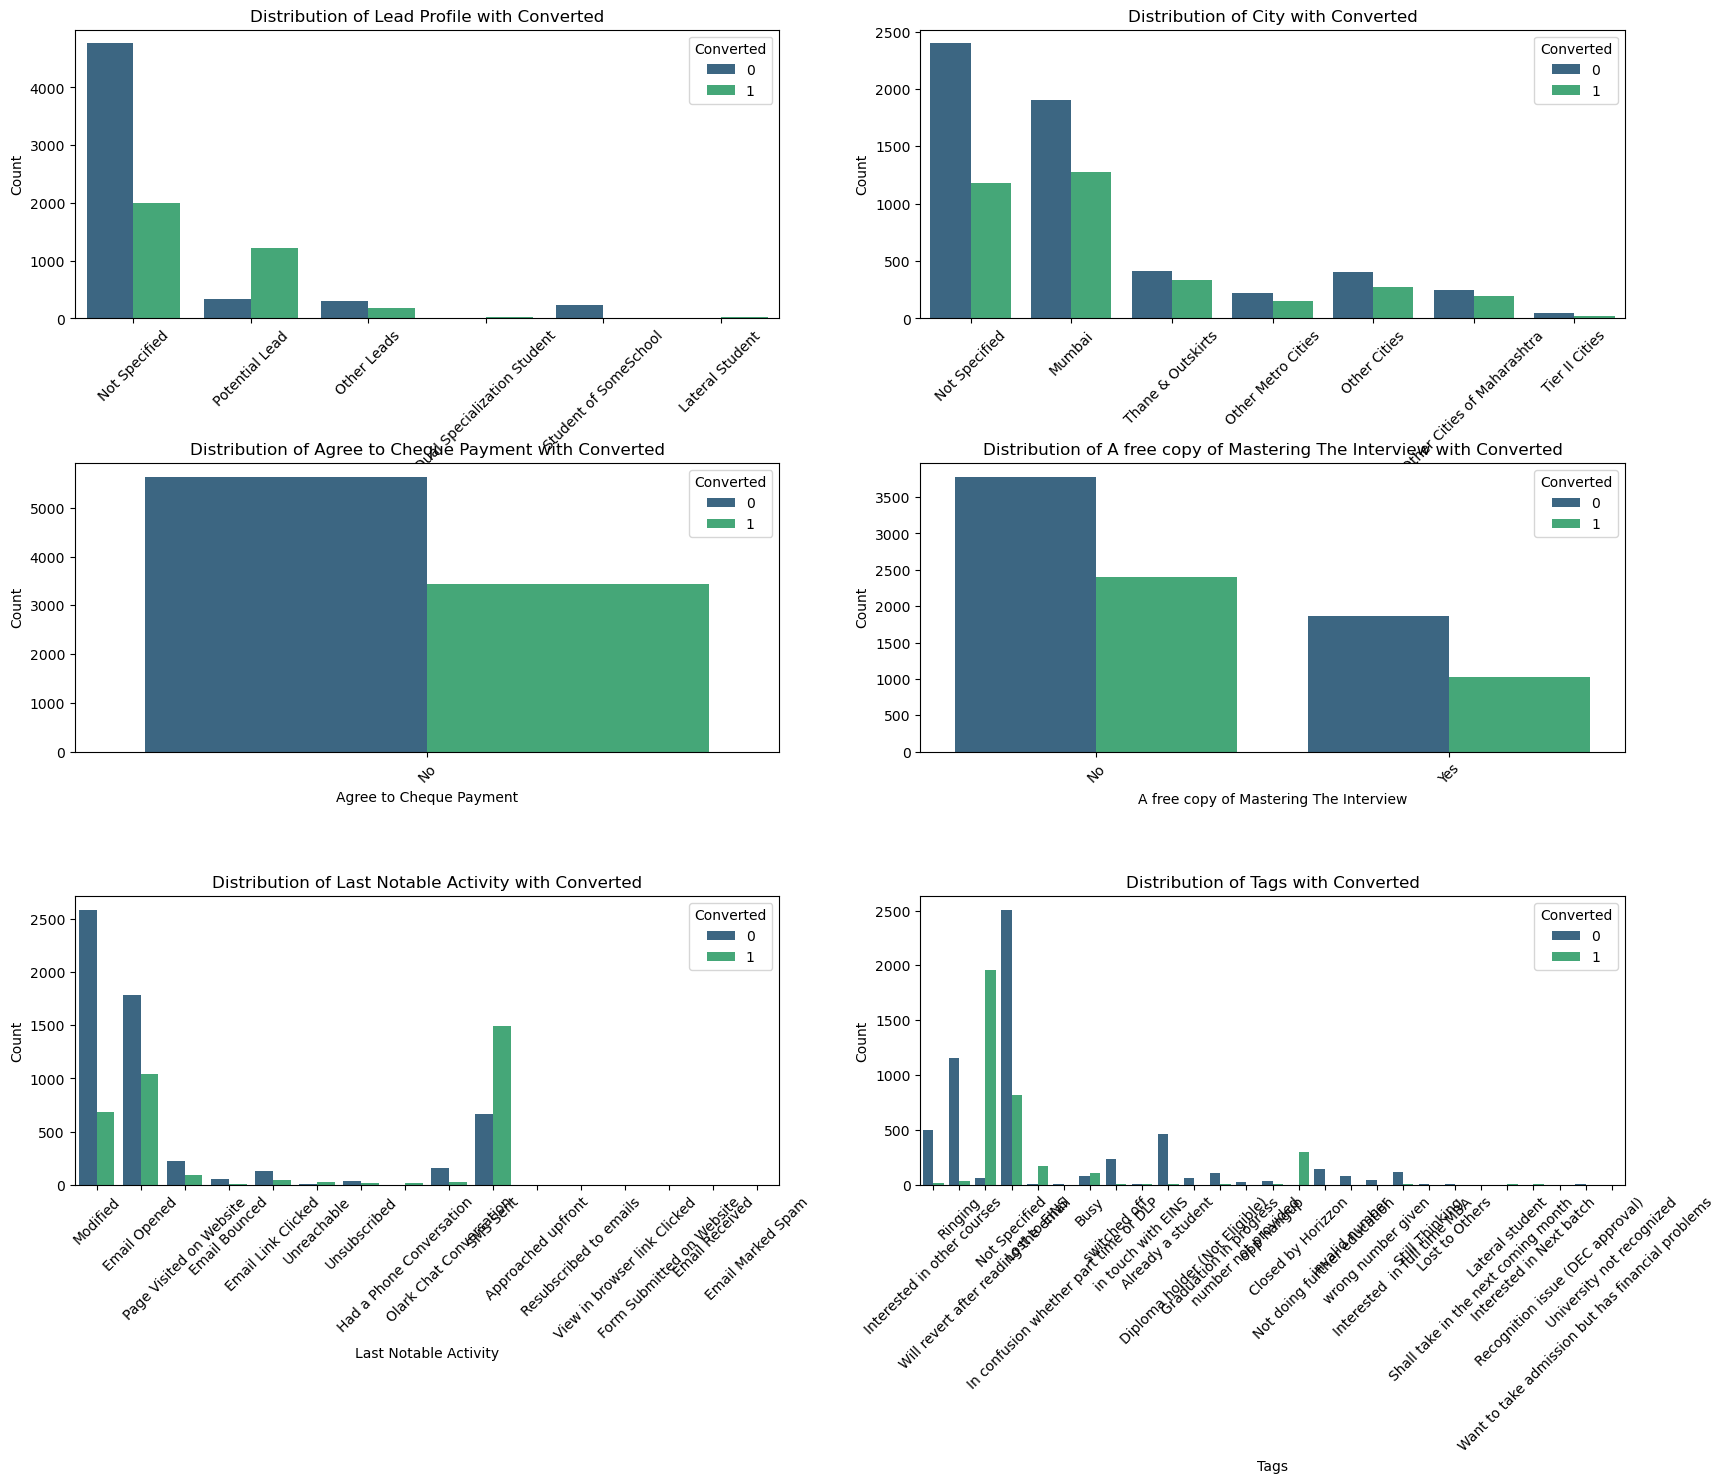

In [33]:
categorical_columns = ['Lead Profile', 'City', 'Agree to Cheque Payment', 
                         'A free copy of Mastering The Interview', 'Last Notable Activity', 'Tags']
plot_categorical_columns(lead_df, categorical_columns)

- **City:** Mumbai leads have the highest conversion rate, possibly due to the high population and business opportunities in the city.
- **Tags:** Tags like "Closed by Horizzon" and "Will Revert After Reading the Email" have a significant number of conversions.

In [34]:
# Dropping the columns 'Lead Profile', 'Agree to Cheque Payment' and 'A free copy of Mastering The Interview' 
# which are not much useful for analysis

lead_df.drop(columns=['Lead Profile', 'Agree to Cheque Payment', 'A free copy of Mastering The Interview'], inplace=True)

In [35]:
# Identify values with fewer than 150 occurrences for "Tags"

Tags_counts = lead_df['Tags'].value_counts()
values_to_replace_Tags = Tags_counts[Tags_counts < 150].index

# Create a new category "Other" for "Tags"

lead_df['Tags'] = lead_df['Tags'].replace(values_to_replace_Tags, 'Others')

In [36]:
# Identify values with fewer than 50 occurrences for "Last Notable Activity"

Last_Notable_Activity_counts = lead_df['Last Notable Activity'].value_counts()
values_to_replace_Last_Notable_Activity = Last_Notable_Activity_counts[Last_Notable_Activity_counts < 50].index

# Create a new category "Other" for "Last Notable Activity"

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(values_to_replace_Last_Notable_Activity, 'Others')

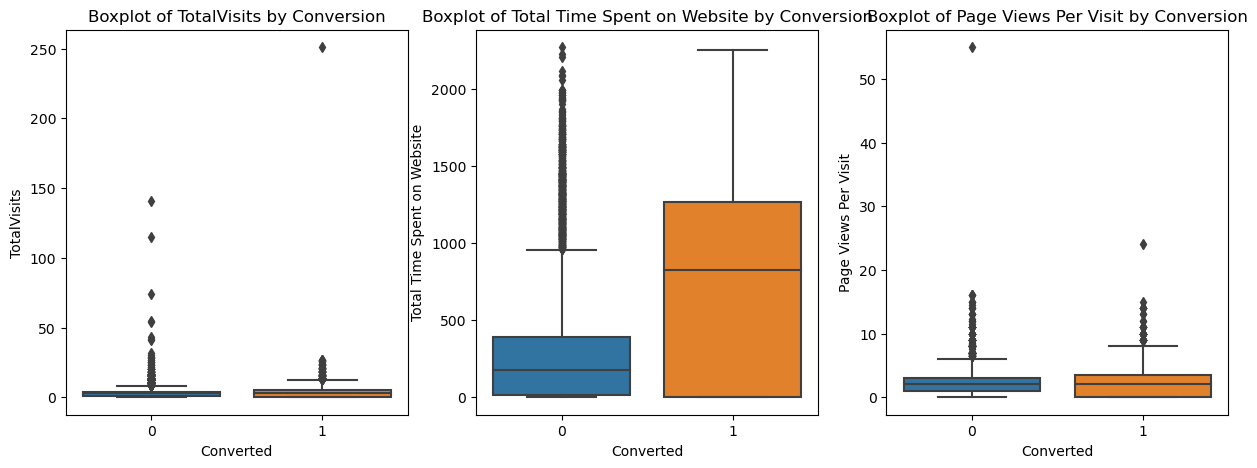

In [37]:
# Visualizing the distribution of numerical variables across different categories, identifying outliers and understanding the spread of the data using box plots

# List of numerical columns to visualize
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Setting up the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Iterating through numerical columns and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Converted', y=column, data=lead_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Conversion')
    axes[i].set_xlabel('Converted')
    axes[i].set_ylabel(column)

# Show the plots
plt.show()

### Outlier detection and treatment

In [38]:
# Function for outlier detection in predictor variables
def outlier_detection(variable_name):
    Q1 = lead_df[variable_name].quantile(0.25)
    Q3 = lead_df[variable_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers using the 1.5*IQR criterion
    outliers = lead_df[(lead_df[variable_name] < (Q1 - 1.5*IQR)) | (lead_df[variable_name] > (Q3 + 1.5*IQR))]
    
    return outliers

In [40]:
# Outlier detection and removal for "TotalVisits"
TotalVisits_outliers = outlier_detection("TotalVisits")
lead_df = lead_df[~lead_df.index.isin(TotalVisits_outliers.index)]

# Outlier cross-check for "TotalVisits"
TotalVisits_remaining_outliers = outlier_detection("TotalVisits")
print(f"Remaining outliers in 'TotalVisits': {len(TotalVisits_remaining_outliers)}")

# Outlier detection and removal for "Total Time Spent on Website"
TimeSpent_outliers = outlier_detection("Total Time Spent on Website")
lead_df = lead_df[~lead_df.index.isin(TimeSpent_outliers.index)]

# Outlier cross-check for "Total Time Spent on Website"
TimeSpent_remaining_outliers = outlier_detection("Total Time Spent on Website")
print(f"Remaining outliers in 'Total Time Spent on Website': {len(TimeSpent_remaining_outliers)}")

# Outlier detection and removal for "Page Views Per Visit"
PageViews_outliers = outlier_detection("Page Views Per Visit")
lead_df = lead_df[~lead_df.index.isin(PageViews_outliers.index)]

# Outlier cross-check for "Page Views Per Visit"
PageViews_remaining_outliers = outlier_detection("Page Views Per Visit")
print(f"Remaining outliers in 'Page Views Per Visit': {len(PageViews_remaining_outliers)}")

Remaining outliers in 'TotalVisits': 0
Remaining outliers in 'Total Time Spent on Website': 0
Remaining outliers in 'Page Views Per Visit': 0


`Outliers have been successfully removed from the data.`

In [41]:
lead_df.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0            Not Specified                      Unemployed   
1            Not Specified                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4            Not Specified                      Unemployed   

                                  Tags           City Last Notable Activity  
0          Interested in other courses  Not Specified              Modified  
1                              Ringing  Not Specified          Email Opened  
2  Will revert after reading the email         Mumbai          Email Opened  
3                              Ringing         Mumbai              Modified  
4  Will revert after reading the email         Mumbai              Modified

## <font color = blue> Data Preprocessing </font>
Encoding categorical variables and scaling numerical features.

### Creating dummy variables for categorical columns 

In [42]:
# List of categorical columns for which dummy variable will be created
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
                       'Tags', 'City', 'Last Notable Activity']

In [43]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3108
Email Opened               2607
SMS Sent                   2007
Page Visited on Website     238
Olark Chat Conversation     173
Email Link Clicked          160
Others                       90
Email Bounced                59
Name: count, dtype: int64

In [44]:
# Creating dummy variables 

# For columns 'Lead Origin', 'What is your current occupation' and 'City'

dummy_columns1 = pd.get_dummies(lead_df[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)

# For 'Lead Source'

dummy_columns2 = pd.get_dummies(lead_df['Lead Source'], prefix='Lead Source')
dummy_columns2 = dummy_columns2.drop('Lead Source_Others', axis=1)

# For 'Last Activity'

dummy_columns3 = pd.get_dummies(lead_df['Last Activity'], prefix='Last Activity')
dummy_columns3 = dummy_columns3.drop('Last Activity_Others', axis=1)

# For 'Specialization'

dummy_columns4 = pd.get_dummies(lead_df['Specialization'], prefix='Specialization')
dummy_columns4 = dummy_columns4.drop('Specialization_Not Specified', axis=1)

# For 'Tags'

dummy_columns5 = pd.get_dummies(lead_df['Tags'], prefix='Tags')
dummy_columns5 = dummy_columns5.drop('Tags_Not Specified', axis=1)

# For 'Last Notable Activity'

dummy_columns6 = pd.get_dummies(lead_df['Last Notable Activity'], prefix='Last Notable Activity')
dummy_columns6 = dummy_columns6.drop('Last Notable Activity_Others', axis=1)


# Concatenating the dummy columns with the original DataFrame

lead_df = pd.concat([lead_df, dummy_columns1, dummy_columns2, dummy_columns3, dummy_columns4,
                     dummy_columns5, dummy_columns6], axis=1)

In [45]:
# Dropping the original categorical columns

lead_df.drop(categorical_columns, axis=1, inplace=True)

In [46]:
# List of boolean columns
boolean_columns = lead_df.select_dtypes(include='bool').columns

# Convert boolean columns to integer values
lead_df[boolean_columns] = lead_df[boolean_columns].astype(int)

In [47]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 9073
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8442 non-null   int64  
 1   TotalVisits                                           8442 non-null   float64
 2   Total Time Spent on Website                           8442 non-null   int64  
 3   Page Views Per Visit                                  8442 non-null   float64
 4   Lead Origin_Landing Page Submission                   8442 non-null   int32  
 5   Lead Origin_Lead Add Form                             8442 non-null   int32  
 6   Lead Origin_Lead Import                               8442 non-null   int32  
 7   What is your current occupation_Housewife             8442 non-null   int32  
 8   What is your current occupation_Not Specified         8442 non-

### Train-Test Split
Splitting the data into training and testing sets.


In [48]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (70% training, 30% testing)
df_train, df_test = train_test_split(lead_df, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the variables

Scaling the variables is performed to standardize the range of features, ensuring that all features contribute equally to the model. 

In [49]:
# Scaling the numerical variables in the training set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numerical columns to be scaled
num_columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Apply scaling to the numerical columns in the training set
df_train[num_columns_to_scale] = scaler.fit_transform(df_train[num_columns_to_scale])

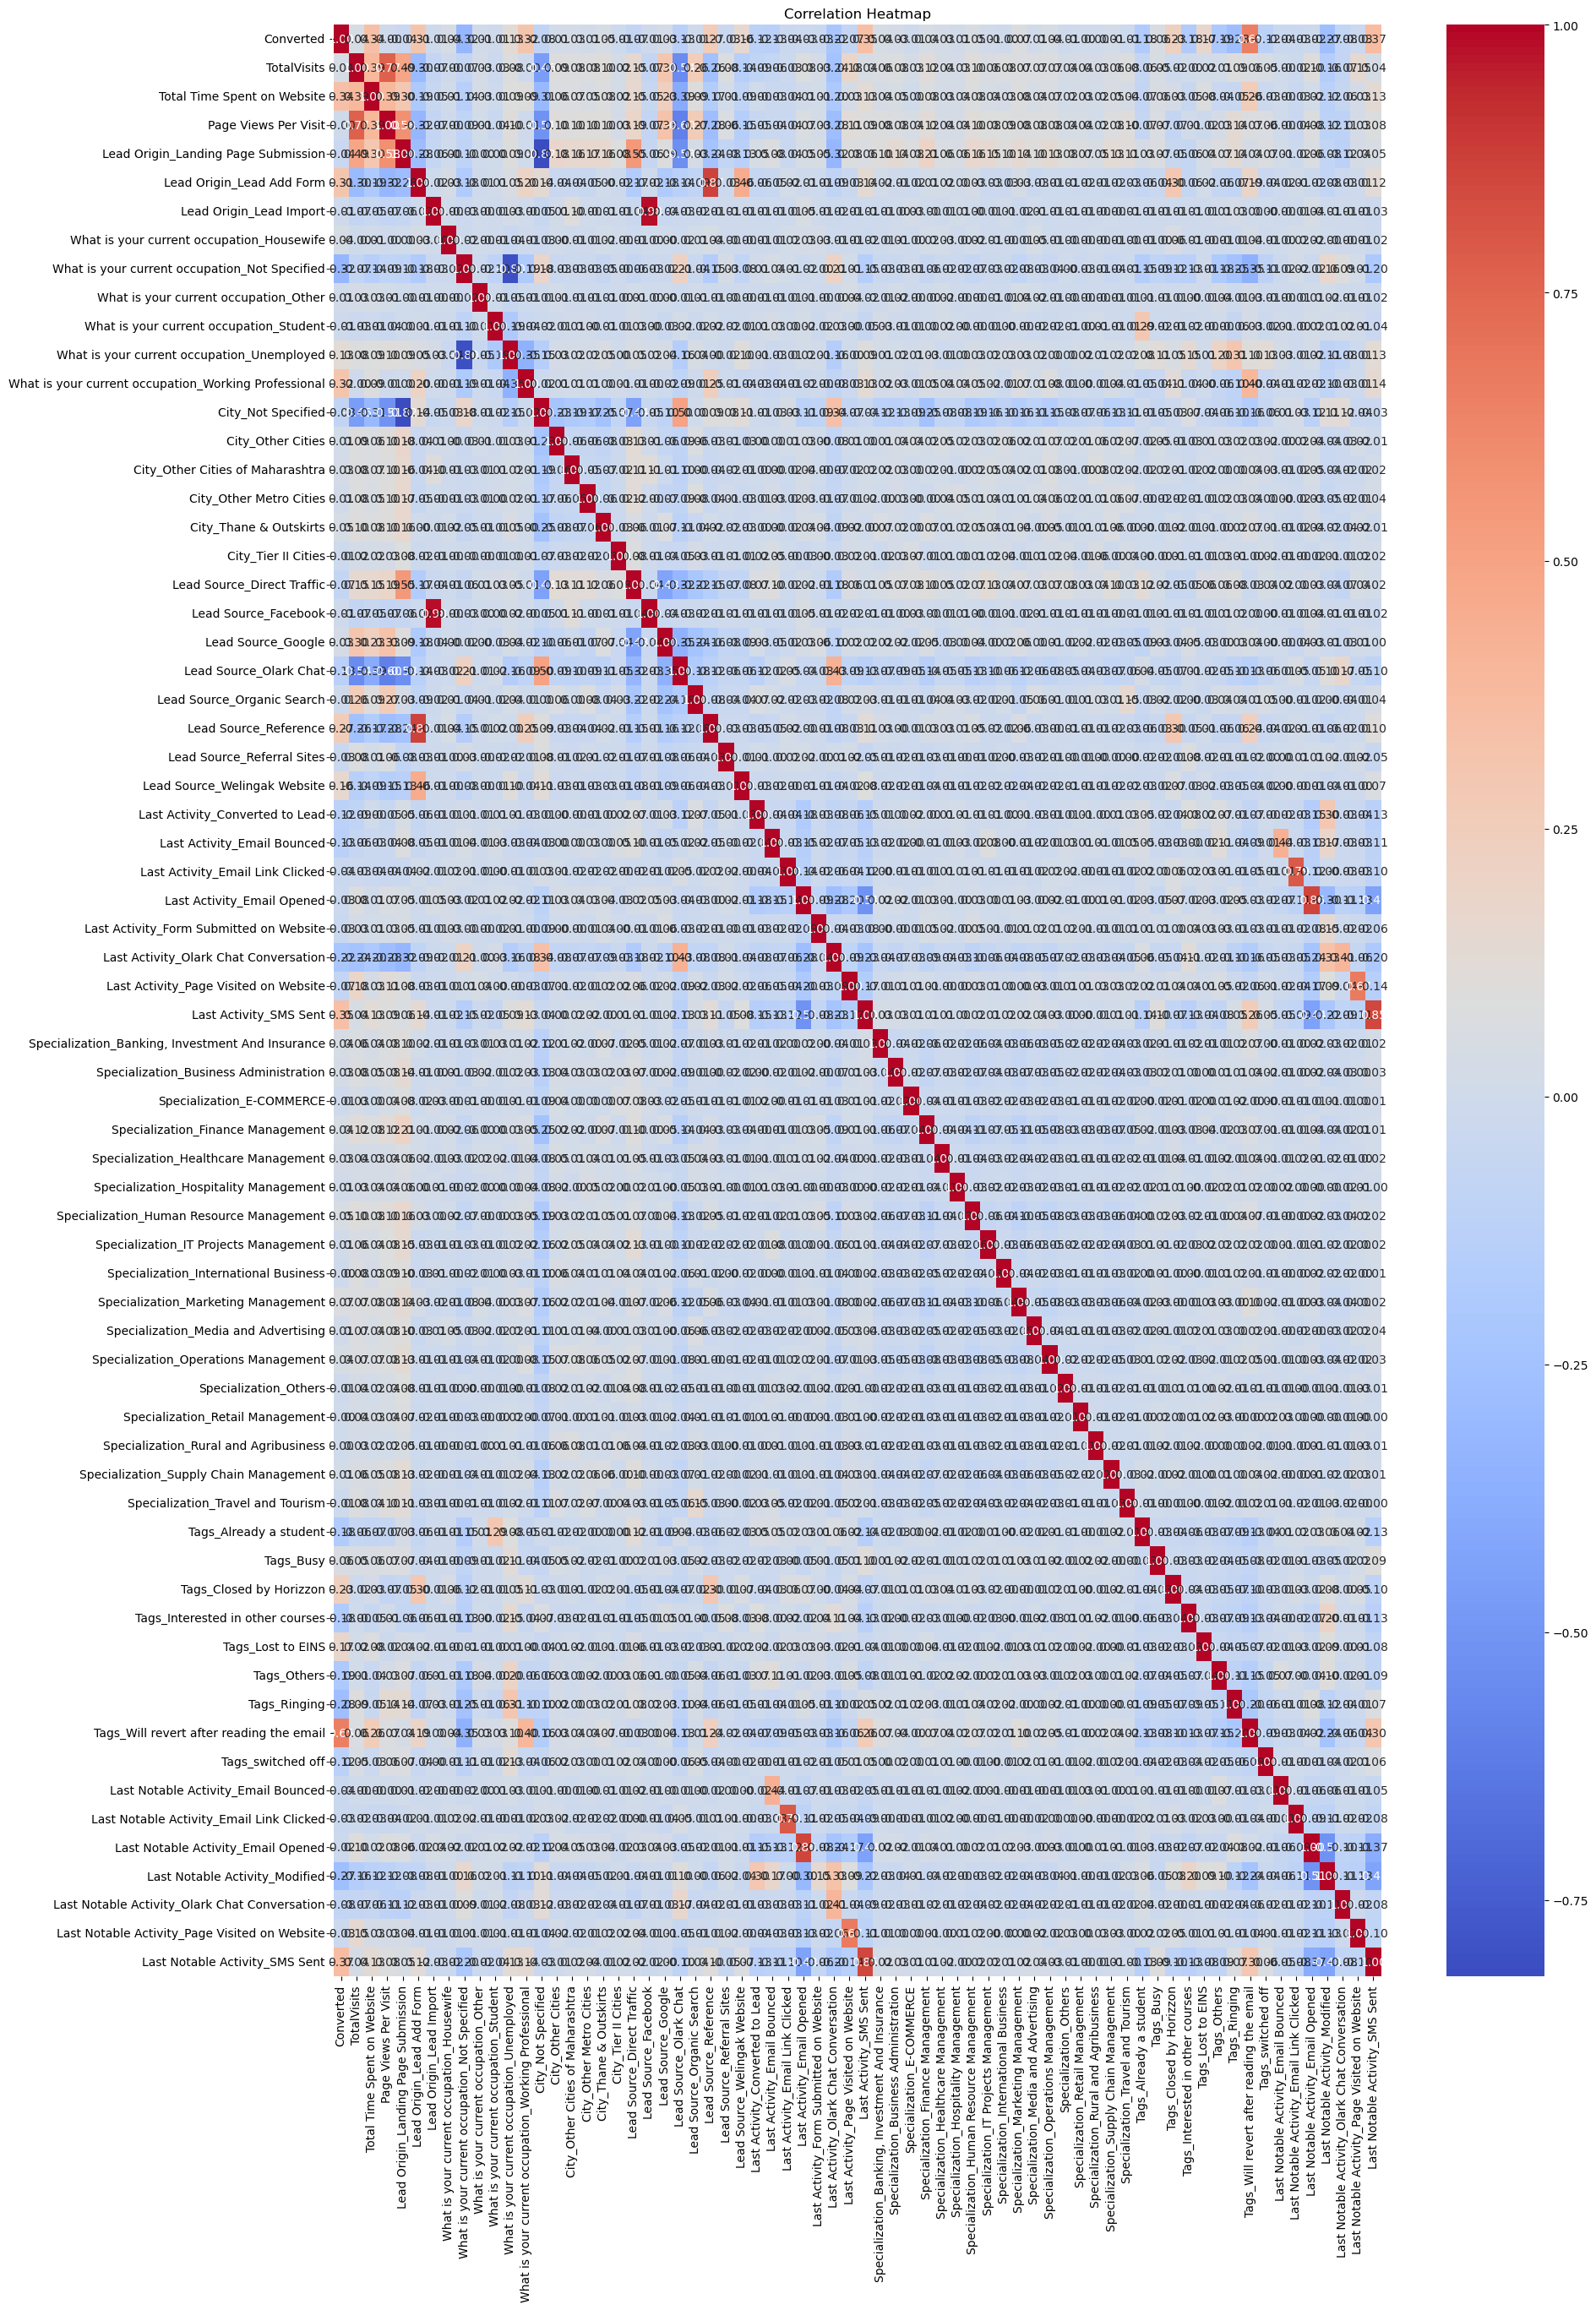

In [50]:
# Visualizing the correlation between features using a heatmap

# Plotting the heatmap
plt.figure(figsize=(20, 30))
sns.heatmap(lead_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## <font color = blue> Feature Selection </font>
 Identify the most relevant features that contribute to lead conversion.

In [51]:
# Separating the target variable and predictor variables for the training set
y_train = df_train.pop("Converted")
X_train = df_train

### Variable selection with RFE

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Creating an instance of Logistic Regression
log_reg = LogisticRegression()

# Creating an instance of Recursive Feature Elimination (RFE) with Logistic Regression as the estimator
rf_e = RFE(log_reg, n_features_to_select=20)

# Fitting RFE on the training data
rf_e.fit(X_train, y_train)

# Displaying the features selected by RFE
selected_features = X_train.columns[rf_e.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Not Specified',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [53]:
# List of features with their support and ranking from RFE

list(zip(X_train.columns, rf_e.support_, rf_e.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('What is your current occupation_Housewife', False, 14),
 ('What is your current occupation_Not Specified', True, 1),
 ('What is your current occupation_Other', False, 16),
 ('What is your current occupation_Student', False, 44),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', False, 5),
 ('City_Not Specified', False, 30),
 ('City_Other Cities', False, 39),
 ('City_Other Cities of Maharashtra', False, 13),
 ('City_Other Metro Cities', False, 46),
 ('City_Thane & Outskirts', False, 41),
 ('City_Tier II Cities', False, 48),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),


In [54]:
# Extracting features that are not selected by RFE

X_train.columns[~rf_e.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Not Specified', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 

## <font color = blue> Model Building </font>
Train a Logistic Regression model to predict the likelihood of lead conversion based on selected features.

In [55]:
import statsmodels.api as sm

# Adding a constant to the features
X_train_sm = sm.add_constant(X_train[selected_features])

# Creating a generalized linear model (GLM) with binomial family
model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
lead_model = model.fit()

# Displaying the summary of the model
print(lead_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5909
Model:                            GLM   Df Residuals:                     5888
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.7
Date:                Mon, 15 Jan 2024   Deviance:                       2035.5
Time:                        22:58:42   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6246
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Inference:**
The p-value of the feature "Last Notable Activity_Olark Chat Conversation" is 0.559, which is greater than the commonly used significance level of 0.05. Therefore, this feature is not statistically significant, and we may consider removing it from the model to improve its simplicity and interpretability.


In [56]:
# Removing the feature "Last Notable Activity_Olark Chat Conversation" from the selected features

selected_features = selected_features.drop("Last Notable Activity_Olark Chat Conversation")

In [57]:
# Building the model again with updated features

# Adding a constant to the features
X_train_sm = sm.add_constant(X_train[selected_features])

# Creating a generalized linear model (GLM) with binomial family
model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
lead_model2 = model.fit()

# Displaying the summary of the model
print(lead_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5909
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.9
Date:                Mon, 15 Jan 2024   Deviance:                       2035.8
Time:                        22:58:44   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6246
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Inference:** The p-value of all variables are less than 0.05 which indicates they are all significant.

In [58]:
# Check for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Feature   VIF
3                          Lead Source_Olark Chat  1.86
1                       Lead Origin_Lead Add Form  1.85
15       Tags_Will revert after reading the email  1.63
18                 Last Notable Activity_SMS Sent  1.58
7           Last Activity_Olark Chat Conversation  1.56
2   What is your current occupation_Not Specified  1.47
0                     Total Time Spent on Website  1.46
4                    Lead Source_Welingak Website  1.33
10                        Tags_Closed by Horizzon  1.20
8           Last Activity_Page Visited on Website  1.14
5                 Last Activity_Converted to Lead  1.13
13                                    Tags_Others  1.13
14                                   Tags_Ringing  1.13
6                     Last Activity_Email Bounced  1.09
11               Tags_Interested in other courses  1.09
9                          Tags_Already a student  1.09
16                              Tags_switched off  1.05
17       Last Notable Activity_Email Link Clicked  1.04
12                              Tags_Lost to EINS  1.03

**Inferences:** 
The Variance Inflation Factor (VIF) values for all variables are well below the commonly used threshold of 5, indicating that there is no significant multicollinearity among the predictor variables. This implies that the selected features are not highly correlated with each other, making the model suitable for further analysis and interpretation. 

## <font color = blue>Model Evaluation</font>
Assess the model's performance using appropriate metrics.

In [59]:
# Predicting the probability of conversion on the training set
y_train_pred = lead_model2.predict(X_train_sm)

# Creating a DataFrame to compare actual conversion status with predicted probabilities
pred_df = pd.DataFrame({'Actual_Conversion': y_train.values, 'Convert_prob': y_train_pred})
pred_df.head()

Actual_Conversion  Convert_prob
7092                  0      0.007724
7796                  0      0.013488
3015                  0      0.288150
87                    1      0.907644
1519                  1      0.992570

In [60]:
# Predicting the output and evaluating model performance

# Adding a new column 'Predicted_Conversion' based on the probability threshold of 0.5
pred_df['Predicted_Conversion'] = pred_df["Convert_prob"].map(lambda x: 1 if x > 0.5 else 0)

# Displaying the head of the DataFrame
pred_df.head()

Actual_Conversion  Convert_prob  Predicted_Conversion
7092                  0      0.007724                     0
7796                  0      0.013488                     0
3015                  0      0.288150                     0
87                    1      0.907644                     1
1519                  1      0.992570                     1

In [61]:
# creating confusion metrix for predicted data

from sklearn import metrics

confusion = metrics.confusion_matrix(pred_df['Actual_Conversion'], pred_df['Predicted_Conversion'])

confusion

array([[3537,  149],
       [ 222, 2001]], dtype=int64)

In [62]:
# Accuracy calculation for predicted data

accuracy = metrics.accuracy_score(pred_df['Actual_Conversion'], pred_df['Predicted_Conversion'])
accuracy

0.9372144186833644

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2001
True negatives is  3537
False positives is  149
False negatives is  222


In [65]:
# Sensitivity (True Positive Rate, Recall)
# Sensitivity measures the proportion of actual positive cases that were correctly identified by the model.

Sensitivity = round(TP / float(TP + FN) * 100, 2)
print('Sensitivity (True Positive Rate, Recall) is ', Sensitivity, '%')

Sensitivity (True Positive Rate, Recall) is  90.01 %


In [66]:
# Specificity (True Negative Rate)
# Specificity measures the proportion of actual negative cases that were correctly identified by the model.

Specificity = round(TN / float(TN + FP) * 100, 2)
print('Specificity (True Negative Rate) is ', Specificity, '%')

Specificity (True Negative Rate) is  95.96 %


In [67]:
# False Positive Rate (FPR) 
# This term gives the number of false positives (0s predicted as 1s) divided by the total number of negatives.

FPR = round(FP / float(TN + FP) * 100, 2)
print('False Positive Rate (FPR) is ', FPR, '%')

False Positive Rate (FPR) is  4.04 %


**Inference:** 
-  The sensitivity (true positive rate, recall) and specificity (true negative rate) metrics provide insights into the model's performance. A high sensitivity indicates that the model effectively identifies positive cases, while a high specificity signifies accurate identification of negative cases.
- Sensitivity and Specificity percentages are satisfactory, suggesting that the model performs well in predicting both positive and negative outcomes.

### Receiver Operating Characteristic (ROC)
Receiver Operating Characteristic (ROC) Curves which show the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR)

In [68]:
# Defining function to plot ROC curve

def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob, drop_intermediate = False)
    roc_auc = metrics.roc_auc_score( y_true, y_pred_prob )
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

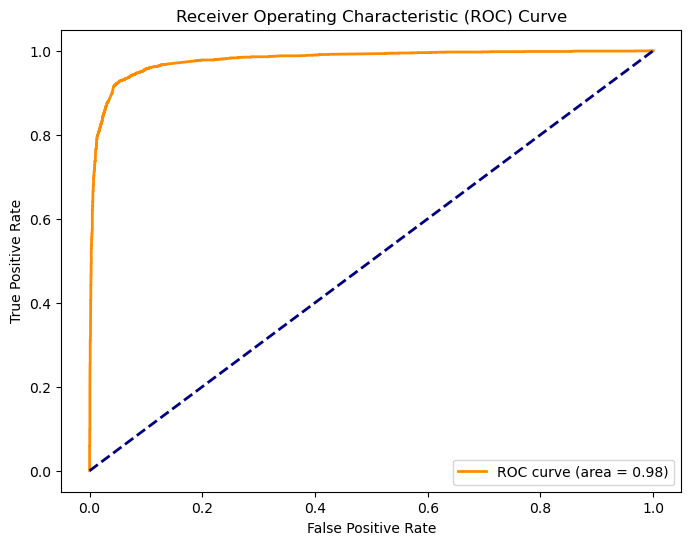

In [69]:
plot_roc_curve(pred_df['Actual_Conversion'], pred_df['Convert_prob'])

**Inference:** A higher AUC-ROC Score closer to 1 indicates a good model. Here, we observe a high AUC-ROC Score of 0.98, suggesting strong predictive performance.


### Finding the Optimal Threshold

In [70]:
# Creating an empty DataFrame to store cutoff values and corresponding metrics
cutoff_df = pd.DataFrame(columns=['Cutoff', 'Accuracy', 'Sensitivity', 'Specificity'])

# Importing necessary library
from sklearn.metrics import confusion_matrix

# Defining a range of cutoff values
cutoff_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Loop through each cutoff value
for cutoff in cutoff_values:
    # Generating confusion matrix using the current cutoff value
    cm = confusion_matrix(pred_df['Actual_Conversion'], (pred_df['Convert_prob'] > cutoff).astype(int))
    
    # Calculating metrics
    accuracy = (cm[0, 0] + cm[1, 1]) / sum(sum(cm))
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    # Appending values to the DataFrame
    cutoff_df = pd.concat([cutoff_df, pd.DataFrame({'Cutoff': [cutoff], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity], 'Specificity': [specificity]})], ignore_index=True)

# Displaying the DataFrame
print(cutoff_df)

   Cutoff  Accuracy  Sensitivity  Specificity
0     0.0  0.376206     1.000000     0.000000
1     0.1  0.871890     0.976608     0.808736
2     0.2  0.920799     0.957265     0.898806
3     0.3  0.933491     0.935223     0.932447
4     0.4  0.940938     0.921278     0.952794
5     0.5  0.937214     0.900135     0.959577
6     0.6  0.931968     0.869096     0.969886
7     0.7  0.928076     0.850202     0.975041
8     0.8  0.918260     0.811966     0.982366
9     0.9  0.896091     0.740891     0.989691


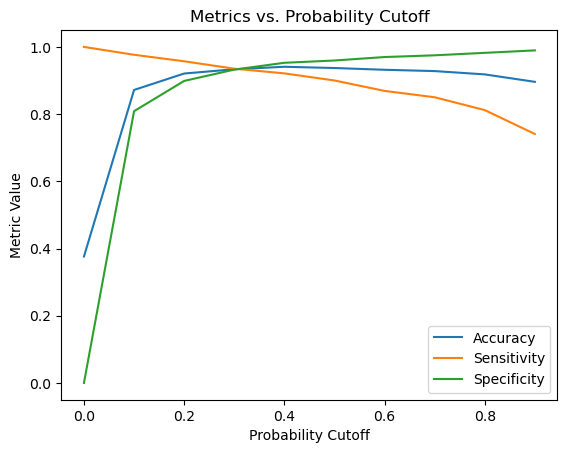

In [71]:
# Plotting accuracy, sensitivity, and specificity for various probabilities

cutoff_df.plot.line(x='Cutoff', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Cutoff')
plt.show()

**Inference:** At about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose 0.3 as the optimal cut-off point. The following graph also showcases that at about 0.3, the three metrics intersect.

In [72]:
# Predicting the output and evaluating model performance again

# Adding a new column 'Final_Predicted_Conversion' based on the optimal threshold of 0.3
pred_df['Final_Predicted_Conversion'] = pred_df["Convert_prob"].map(lambda x: 1 if x > 0.3 else 0)

# Displaying the head of the DataFrame
pred_df.head()

Actual_Conversion  Convert_prob  Predicted_Conversion  \
7092                  0      0.007724                     0   
7796                  0      0.013488                     0   
3015                  0      0.288150                     0   
87                    1      0.907644                     1   
1519                  1      0.992570                     1   

      Final_Predicted_Conversion  
7092                           0  
7796                           0  
3015                           0  
87                             1  
1519                           1

In [73]:
# creating confusion metrix again for final predicted data

confusion = metrics.confusion_matrix(pred_df['Actual_Conversion'], pred_df['Final_Predicted_Conversion'])

confusion

array([[3437,  249],
       [ 144, 2079]], dtype=int64)

In [74]:
# Accuracy calculation for predicted data

accuracy = metrics.accuracy_score(pred_df['Actual_Conversion'], pred_df['Predicted_Conversion'])
accuracy

0.9372144186833644

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2079
True negatives is  3437
False positives is  249
False negatives is  144


In [77]:
# Sensitivity (True Positive Rate, Recall)
# Sensitivity measures the proportion of actual positive cases that were correctly identified by the model.

Sensitivity = round(TP / float(TP + FN) * 100, 2)
print('Sensitivity (True Positive Rate, Recall) is ', Sensitivity, '%')

Sensitivity (True Positive Rate, Recall) is  93.52 %


In [78]:
# Specificity (True Negative Rate)
# Specificity measures the proportion of actual negative cases that were correctly identified by the model.

Specificity = round(TN / float(TN + FP) * 100, 2)
print('Specificity (True Negative Rate) is ', Specificity, '%')

Specificity (True Negative Rate) is  93.24 %


In [79]:
# False Positive Rate (FPR) 
# This term gives the number of false positives (0s predicted as 1s) divided by the total number of negatives.

FPR = round(FP / float(TN + FP) * 100, 2)
print('False Positive Rate (FPR) is ', FPR, '%')

False Positive Rate (FPR) is  6.76 %


In [80]:
# Precision: Probability that a predicted 'Yes' is actually a 'Yes'.

Precision = round(TP / float(TP + FP) * 100, 2)
print('Precision is ', Precision, '%')

# Recall:  Probability that an actual 'Yes' case is predicted correctly.

Recall = Sensitivity.copy()
print('Recall is ', Recall, '%')

Precision is  89.3 %
Recall is  93.52 %


**Inference:**
- The model achieved an overall accuracy of approximately 93.72%, indicating that it correctly predicted the conversion status for about 93.72% of the observations.
- Sensitivity (True Positive Rate, Recall) is high at 93.52%, indicating that the model effectively identified a significant portion of the actual positive cases (converted leads).
- Specificity (True Negative Rate) is also high at 93.24%, suggesting that the model performed well in identifying non-converted leads.
- The False Positive Rate (FPR) is relatively low at 6.76%, indicating a good balance between correctly identifying positive cases and minimizing false alarms.
- Precision, which measures the accuracy of positive predictions, is 89.3%. This indicates that out of all predicted conversions, about 89.3% are true conversions.
- Recall, representing the proportion of actual positive cases correctly predicted by the model, is 93.52%, indicating a high ability to capture actual conversions.

Overall, the model seems to perform well across various metrics, demonstrating a good balance between precision and recall, and effectively distinguishing between converted and non-converted leads.


## <font color = blue> Prediction and Evaluation on Test Set </font>

#### Scaling the numerical variables in the test set.
To ensure consistency in the preprocessing steps between the training and test sets, numerical variables in the test set are scaling using the same scaling parameters obtained from the training set.


In [81]:
# Scaling the numerical variables in the test set

df_test[num_columns_to_scale] = scaler.transform(df_test[num_columns_to_scale])

In [82]:
# Separating the target variable and predictor variables for the testing set
y_test = df_test.pop("Converted")
X_test = df_test

In [83]:
# Adding a constant to the features in the test set

X_test_sm = sm.add_constant(X_test[selected_features])

# Predicting the probability of conversion on the test set

y_test_pred = lead_model2.predict(X_test_sm)

# Creating a DataFrame to compare actual conversion status with predicted probabilities

test_pred = pd.DataFrame({'Actual_Conversion': y_test.values, 'Convert_prob': y_test_pred})
test_pred.head()

Actual_Conversion  Convert_prob
1866                  1      0.961767
6378                  0      0.013852
1158                  0      0.004118
5124                  1      0.995320
6491                  1      0.779103

In [84]:
# Predicting the output and evaluating model performance on test set

# Adding a new column 'Predicted_Conversion' based on the optimal threshold of 0.3
test_pred['Predicted_Conversion'] = test_pred["Convert_prob"].map(lambda x: 1 if x > 0.3 else 0)

# Displaying the head of the DataFrame
test_pred.head()

Actual_Conversion  Convert_prob  Predicted_Conversion
1866                  1      0.961767                     1
6378                  0      0.013852                     0
1158                  0      0.004118                     0
5124                  1      0.995320                     1
6491                  1      0.779103                     1

In [85]:
# creating confusion metrix for test predicted data

confusion = metrics.confusion_matrix(test_pred['Actual_Conversion'], test_pred['Predicted_Conversion'])

confusion

array([[1491,  101],
       [  62,  879]], dtype=int64)

In [86]:
# Accuracy calculation for test predicted data

accuracy = metrics.accuracy_score(test_pred['Actual_Conversion'], test_pred['Predicted_Conversion'])
accuracy

0.9356494275562574

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  879
True negatives is  1491
False positives is  101
False negatives is  62


In [89]:
# Sensitivity calculation for test predicted data 

Sensitivity = round(TP / float(TP + FN) * 100, 2)
print('Sensitivity (True Positive Rate, Recall) is ', Sensitivity, '%')

Sensitivity (True Positive Rate, Recall) is  93.41 %


In [90]:
# Specificity calculation for test predicted data 

Specificity = round(TN / float(TN + FP) * 100, 2)
print('Specificity (True Negative Rate) is ', Specificity, '%')

Specificity (True Negative Rate) is  93.66 %


In [91]:
# False Positive Rate (FPR) calculation for test predicted data 

FPR = round(FP / float(TN + FP) * 100, 2)
print('False Positive Rate (FPR) is ', FPR, '%')

False Positive Rate (FPR) is  6.34 %


In [92]:
# Precision calculation for test predicted data 

Precision = round(TP / float(TP + FP) * 100, 2)
print('Precision is ', Precision, '%')

# Recall calculation for test predicted data 

Recall = Sensitivity.copy()
print('Recall is ', Recall, '%')

Precision is  89.69 %
Recall is  93.41 %


### Inference for Test Data

- **Accuracy (ACC):** 93.57%
  - The overall accuracy of the model on the test set is quite high, indicating a good fit.

- **Sensitivity (True Positive Rate, Recall):** 93.41%
  - The model correctly identifies 93.41% of the actual conversions, suggesting a strong ability to capture positive instances.

- **Specificity (True Negative Rate):** 93.66%
  - The model exhibits a high specificity, correctly identifying 93.66% of non-conversions, indicating its ability to distinguish negative instances.

- **False Positive Rate (FPR):** 6.34%
  - The low FPR suggests that the model has a relatively low rate of incorrectly classifying non-conversions as conversions.

- **Precision:** 89.69%
  - Among the instances predicted as conversions, 89.69% are true conversions. This indicates the reliability of the model in its positive predictions.

- **Recall:** 93.41%
  - The recall value is consistent with sensitivity, emphasizing the model's effectiveness in capturing actual conversions.

Overall, the model demonstrates robust performance on the test set, with a good balance between precision and recall, as well as high accuracy and specificity.


### <font color = blue> Interpretation of the Final Model (lead_model2) </font>

1. **Constant (`const`):** The constant term represents the log-odds of the baseline scenario when all predictor variables are zero. In this case, it is -0.3274.

2. **Total Time Spent on Website:** For every one-unit increase in the total time spent on the website, the log-odds of the conversion increase by 1.0457.

3. **Lead Origin_Lead Add Form:** Leads originating from the lead add form are 1.5955 times more likely to convert compared to the reference category.

4. **What is your current occupation_Not Specified:** Leads with no specified occupation are 2.1449 times less likely to convert compared to the reference category.

5. **Lead Source_Olark Chat:** Leads generated from Olark Chat are 1.2835 times more likely to convert.

6. **Lead Source_Welingak Website:** Leads from the Welingak website are 3.2369 times more likely to convert.

7. **Last Activity_Converted to Lead:** If the last activity was converting to a lead, the odds of conversion decrease by 1.5373.

8. **Last Activity_Email Bounced:** Email bounce as the last activity decreases the odds of conversion by 1.8454.

9. **Last Activity_Olark Chat Conversation:** An Olark Chat Conversation as the last activity decreases the odds of conversion by 1.6584.

10. **Last Activity_Page Visited on Website:** If the last activity was visiting a page on the website, the odds of conversion decrease by 1.1009.

11. **Tags categories (Already a student, Closed by Horizzon, Interested in other courses, Lost to EINS, Others, Ringing):** These are various tags assigned to leads. For example, "Already a student" decreases the odds of conversion by 4.6532, while "Closed by Horizzon" increases the odds by 4.5340.

17. **Tags_Will revert after reading the email:** This tag increases the odds of conversion by 3.1762.

18. **Tags_switched off:** The tag "switched off" decreases the odds of conversion by 5.7849.

19. **Last Notable Activity (Email Link Clicked, SMS Sent):** Email link clicked decreases the odds by 0.8834, while SMS sent increases the odds by 2.0735.

#### <font color = blue> Recommendations: </font>

1. **Focus on Lead Add Form:** Since leads originating from the lead add form have a higher likelihood of conversion, consider strategies to increase engagement with this form.

2. **Engage Leads from Welingak Website:** As leads from the Welingak website are more likely to convert, ensure that the website is optimized for lead generation and provides valuable information.

3. **Address Tags and Last Activities:** Pay attention to specific tags and last activities that significantly impact conversion. For instance, leads tagged as "Already a student" or with the last activity as "Converted to Lead" may need different strategies.

4. **Optimize Olark Chat Conversations:** Since leads from Olark Chat have higher conversion odds, focus on optimizing and engaging with leads through this channel.

5. **Improve Last Notable Activity - Email Link Clicked:** "SMS Sent" and "Email Link Clicked" have significant impacts. Consider focusing on these activities for effective communication.

6. **Mitigate Negative Influences:** Identify and address factors that negatively impact conversion, such as leads with no specified occupation or those with the last activity as "Email Bounced" or "Ringing."

